In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [44]:
from tqdm import tqdm

# Read data

In [23]:
_file = "../../data/tng100_trees.npz"
with open(_file, 'rb') as fp:
    trees_data = np.load(fp)
    matches = trees_data['matches']
    bdmo = trees_data['bdmo']
    tdmo = trees_data['tdmo']
    bbar = trees_data['bbar']
    tbar = trees_data['tbar']
    


In [25]:
matches.shape, bdmo.shape, bbar.shape, tdmo.shape, tbar.shape

((153348,), (869229,), (153348,), (869229, 100), (153348, 100))

In [36]:
bbar.dtype, bdmo.dtype

(dtype([('infall_snap', '<i4'), ('mpeak', '<f4'), ('mpeak_pre', '<f4'), ('is_err', '?'), ('vpeak', '<f4'), ('vpeak_pre', '<f4')]),
 dtype([('infall_snap', '<i4'), ('mpeak', '<f4'), ('mpeak_pre', '<f4'), ('is_err', '?'), ('vpeak', '<f4'), ('vpeak_pre', '<f4')]))

In [37]:
tbar.dtype, tdmo.dtype

(dtype([('mdm', '<f4'), ('mvir', '<f4'), ('vmax', '<f4'), ('ok', '?'), ('is_sub', '?'), ('subfind_id', '<i8'), ('first_sub_idx', '<i8'), ('match', '<i8'), ('stellar_mass', '<f4')]),
 dtype([('mdm', '<f4'), ('mvir', '<f4'), ('vmax', '<f4'), ('ok', '?'), ('is_sub', '?'), ('subfind_id', '<i8'), ('first_sub_idx', '<i8'), ('match', '<i8')]))

# Preliminary histograms

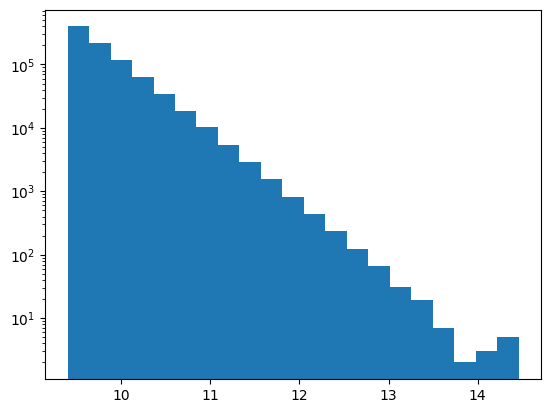

In [15]:
plt.hist(np.log10(bdmo['mpeak_pre']), bins=21)
plt.yscale('log');

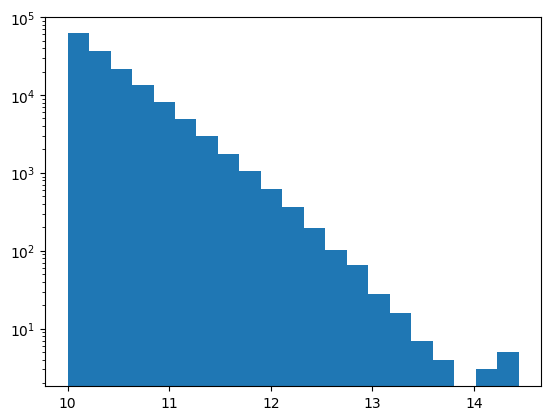

In [16]:
plt.hist(np.log10(bbar['mpeak_pre']), bins=21)
plt.yscale('log');

(array([2.02000e+02, 1.11540e+04, 1.07369e+05, 2.20695e+05, 2.27700e+05,
        1.51843e+05, 7.85700e+04, 3.77830e+04, 1.78480e+04, 8.58900e+03,
        4.09000e+03, 1.78800e+03, 8.60000e+02, 4.09000e+02, 1.90000e+02,
        7.20000e+01, 3.80000e+01, 1.60000e+01, 5.00000e+00, 3.00000e+00,
        5.00000e+00]),
 array([1.26687264, 1.35153723, 1.43620181, 1.52086639, 1.60553098,
        1.69019556, 1.77486002, 1.85952461, 1.94418919, 2.02885389,
        2.11351824, 2.19818282, 2.2828474 , 2.36751199, 2.45217657,
        2.53684115, 2.62150574, 2.70617032, 2.7908349 , 2.87549949,
        2.96016407, 3.04482865]),
 [<matplotlib.patches.Polygon at 0x13b266d50>])

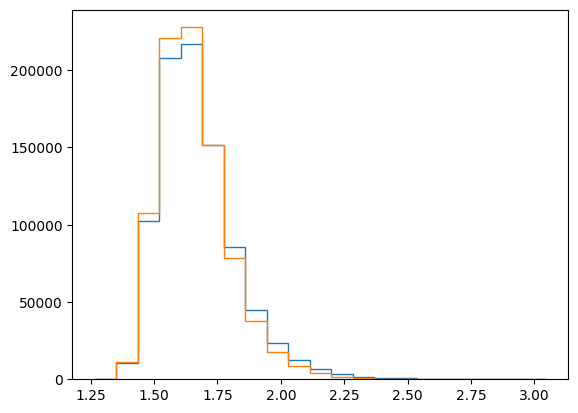

In [22]:
# vmax 
_, bins, _ = plt.hist(np.log10(bdmo['vpeak']), bins=21, histtype='step')
plt.hist(np.log10(bdmo['vpeak_pre']), bins=bins, histtype='step')

(array([1.500e+01, 1.320e+02, 3.016e+03, 6.160e+03, 8.139e+03, 9.189e+03,
        8.924e+03, 8.291e+03, 7.219e+03, 6.350e+03, 5.759e+03, 5.045e+03,
        4.565e+03, 3.965e+03, 3.324e+03, 2.801e+03, 2.411e+03, 1.975e+03,
        1.528e+03, 1.400e+03, 1.040e+03, 1.006e+03, 7.540e+02, 4.140e+02,
        2.060e+02, 1.060e+02, 6.100e+01, 2.900e+01, 2.000e+01, 5.000e+00,
        2.000e+00]),
 array([ 5.56381989,  5.77835512,  5.99288988,  6.20742512,  6.42195988,
         6.63649511,  6.85102987,  7.06556511,  7.28009987,  7.49463511,
         7.70917034,  7.9237051 ,  8.13823986,  8.35277557,  8.56731033,
         8.78184509,  8.99637985,  9.21091461,  9.42545033,  9.63998508,
         9.8545208 , 10.06905556, 10.28359032, 10.49812508, 10.71265984,
        10.9271946 , 11.14173031, 11.35626507, 11.57080078, 11.78533554,
        11.9998703 , 12.21440506]),
 <BarContainer object of 31 artists>)

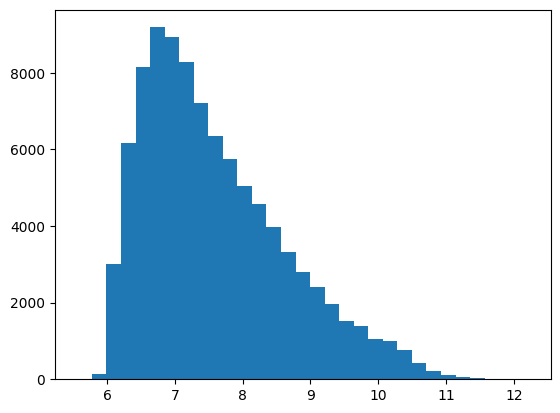

In [34]:
# current stellar mass
star_mass_present = tbar['stellar_mass'][:, -1]
mask = star_mass_present > 0
plt.hist(np.log10(star_mass_present[mask]), bins=31)

# MAH

In [66]:
mask = (tdmo['ok'][:, -1]) & (tdmo['mdm'][:, -1] > 0) & (~bdmo['is_err'])
sum(mask) / len(mask), len(mask)

(np.float64(0.6139624885962157), 869229)

In [ ]:
mvir = tdmo['mdm'][mask]
n_snaps = 100
n_haloes = mvir.shape[0]
mah = np.zeros((n_haloes, n_snaps)) * np.nan

for ii in tqdm(range(n_haloes)):

    mdm = mvir[ii, :]
    _mask = mdm == 0.0
    mdm[_mask] = np.nan

    # linearly interpolate nan values
    mdm = pd.Series(mdm)
    mdm = mdm.interpolate(method="linear", limit_direction="both", axis=0)
    mah[ii] = mdm.values


100%|██████████| 533674/533674 [01:19<00:00, 6705.06it/s]


In [58]:
mah.shape

(533674, 100)

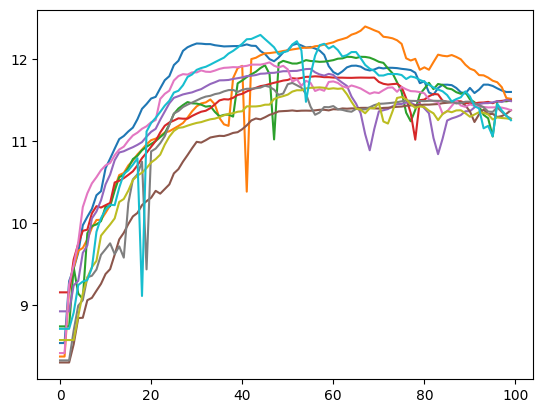

In [59]:
for ii in range(10, 20):
    plt.plot(np.log10(mah[ii]))

In [70]:
# get mpeak
from multicam_tng.utils import get_mpeak_from_mah
mpeak_mah = get_mpeak_from_mah(np.log10(mah))
mpeak_mah.shape

(533674, 100)

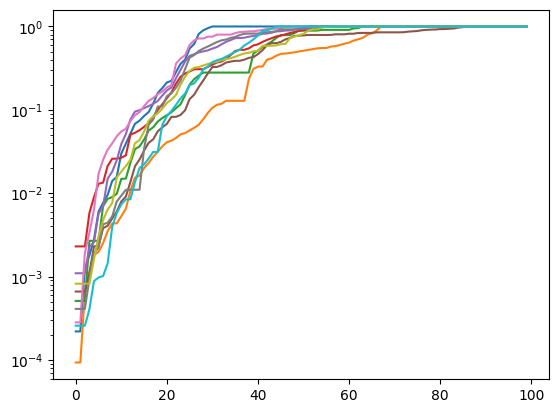

In [71]:
for ii in range(10, 20):
    plt.plot(mpeak_mah[ii])
plt.yscale('log')

In [72]:
mpeak_mah.shape

(533674, 100)

# Output data file for Haley

In [39]:
bdmo.dtype, tdmo.dtype

(dtype([('infall_snap', '<i4'), ('mpeak', '<f4'), ('mpeak_pre', '<f4'), ('is_err', '?'), ('vpeak', '<f4'), ('vpeak_pre', '<f4')]),
 dtype([('mdm', '<f4'), ('mvir', '<f4'), ('vmax', '<f4'), ('ok', '?'), ('is_sub', '?'), ('subfind_id', '<i8'), ('first_sub_idx', '<i8'), ('match', '<i8')]))

In [69]:
subfind_id = tdmo['subfind_id'][:, -1][mask]
vpeak_pre = bdmo['vpeak_pre'][mask]
vpeak = bdmo['vpeak'][mask]
mpeak_pre = bdmo['mpeak_pre'][mask]
is_sub = tdmo['is_sub'][:, -1][mask]
subfind_id.shape, vpeak_pre.shape, is_sub.shape

((533674,), (533674,), (533674,))

In [88]:
out = {
    'subfind_id': subfind_id, 
    'vpeak_pre': vpeak_pre,
    'vpeak': vpeak,
    'mpeak_pre': mpeak_pre,
    'mah': mah,
    'is_sub': is_sub,
    'mpeak_mah': mpeak_mah,
}

with open("../../data/out-trees-tng100-dmo.npz", 'wb') as fp:
    np.savez(fp, **out)

In [87]:
with open("../../data/out-trees-tng100-dmo.npz", 'rb') as fp:
    out_dict = np.load(fp)
    print(out_dict['mpeak_mah'].shape)
    print(list(out_dict.keys())) # available data

(533674, 100)
['subfind_id', 'vpeak_pre', 'vpeak', 'mpeak_pre', 'mah', 'is_sub', 'mpeak_mah']


In [ ]:
# fraction of subhaloes / centrals
sum(is_sub) / len(is_sub)

np.float64(0.38225021267665277)